In [7]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pickle

# Enable inline plotting for Jupyter Notebook
%matplotlib inline


In [12]:
# Function to load data, train GBR model, and evaluate results
def analyze_gbr(data_path, features, target):
    # Load data
    data = pd.read_csv(data_path)
    
    # Split data into features (X) and target (y)
    X = data[features]
    y = data[target]
    
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train Gradient Boosting Regressor
    gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbr.fit(X_train, y_train)

     # Create the model file name by replacing .csv with .pkl
    model_filename = f"gbr_model_{data_path.split('/')[-1].replace('.csv', '.pkl')}"
    
    # Save the trained model with .pkl extension
    with open(model_filename, 'wb') as file:
        pickle.dump(gbr, file)
    print(f"Model saved as {model_filename}")
    
    # Make predictions
    y_pred = gbr.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Analysis for {data_path.split('/')[-1]}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R² Score: {r2}\n")
    
    # Feature importance visualization
    feature_importance = gbr.feature_importances_
    plt.figure(figsize=(8, 6))
    plt.barh(features, feature_importance, color='skyblue')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title(f'Feature Importance for {data_path.split("/")[-1]}')
    plt.show()
    
    # True vs Predicted Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('True H₂ Production')
    plt.ylabel('Predicted H₂ Production')
    plt.title(f'True vs Predicted H₂ Production ({data_path.split("/")[-1]})')
    plt.show()

    # # Plot the training loss
    # plt.figure(figsize=(8, 6))
    # plt.plot(gbr.train_score_, label='Training Loss', color='blue')
    # plt.xlabel('Boosting Iterations')
    # plt.ylabel('Loss (Mean Squared Error)')
    # plt.title('Training Loss Over Boosting Iterations')
    # plt.legend()
    # plt.grid(True)
    # plt.show()

    # Compute loss for predicted and true values for training and test sets
    train_loss = []
    test_loss = []

    # Use staged_predict to get predictions after each boosting stage
    for y_train_pred, y_test_pred in zip(gbr.staged_predict(X_train), gbr.staged_predict(X_test)):
        train_loss.append(mean_squared_error(y_train, y_train_pred))
        test_loss.append(mean_squared_error(y_test, y_test_pred))

    # Plot the training and test loss
    plt.figure(figsize=(10, 6))
    plt.plot(train_loss, label='Training Loss', color='blue', marker='o')
    plt.plot(test_loss, label='Test Loss', color='orange', marker='o')
    plt.xlabel('Boosting Iterations')
    plt.ylabel('Loss (Mean Squared Error)')
    plt.title(f'Training and Test Loss Over Boosting Iterations ({data_path.split("/")[-1]})')
    plt.legend()
    plt.grid(True)
    plt.show()



Model saved as gbr_model_temp_vs_h2.pkl
Analysis for temp_vs_h2.csv:
Mean Squared Error (MSE): 1.2242933984721916e-09
R² Score: 0.9999219601090292



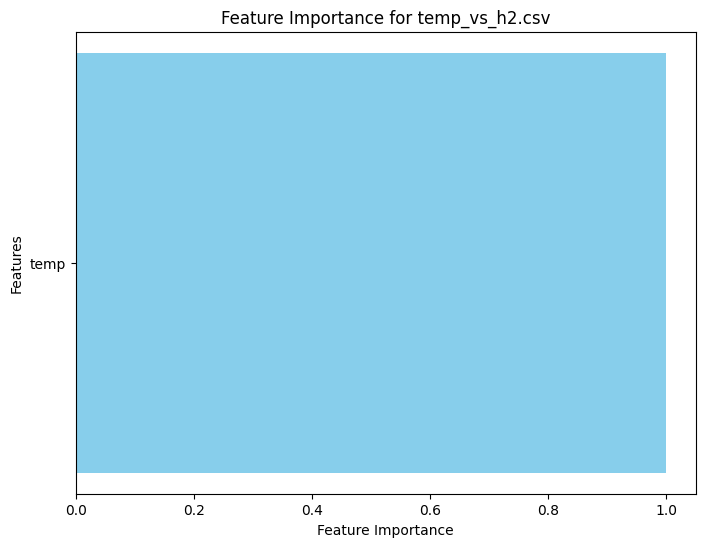

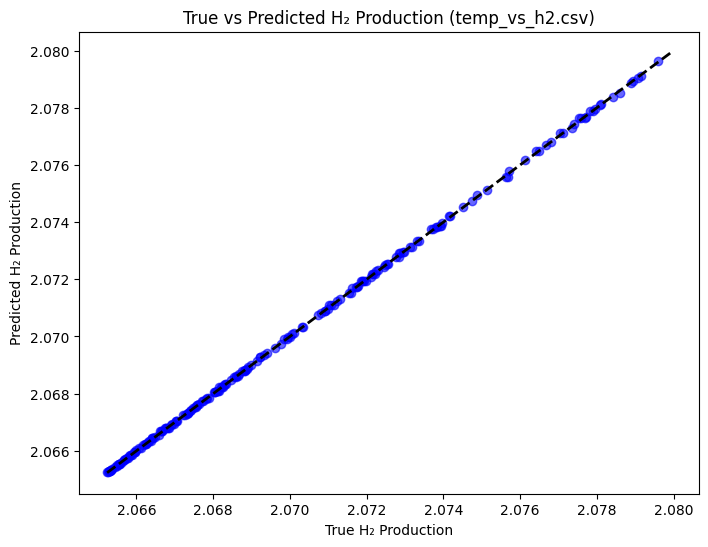

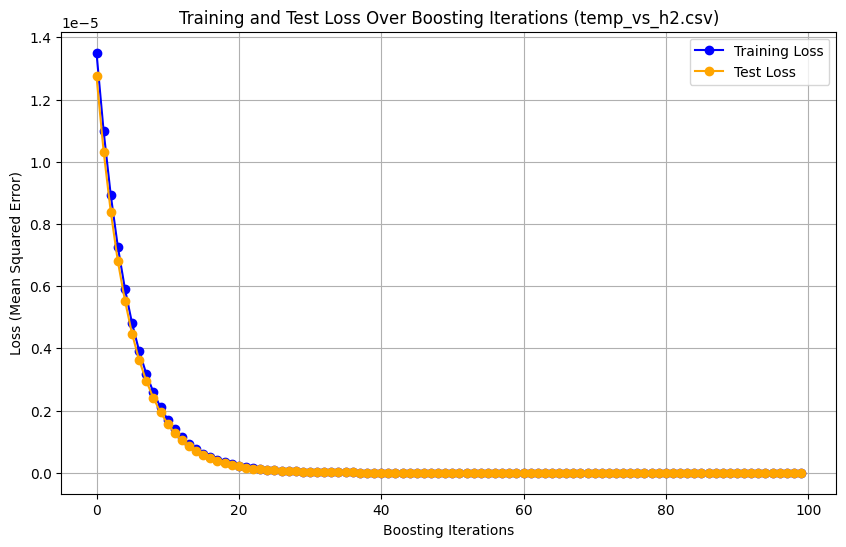

Model saved as gbr_model_press_vs_h2.pkl
Analysis for press_vs_h2.csv:
Mean Squared Error (MSE): 2.830773368887338e-14
R² Score: 0.9999321548370168



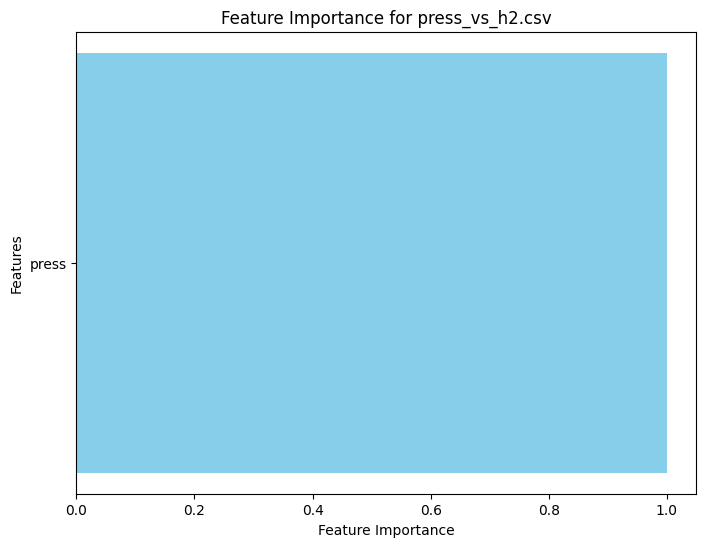

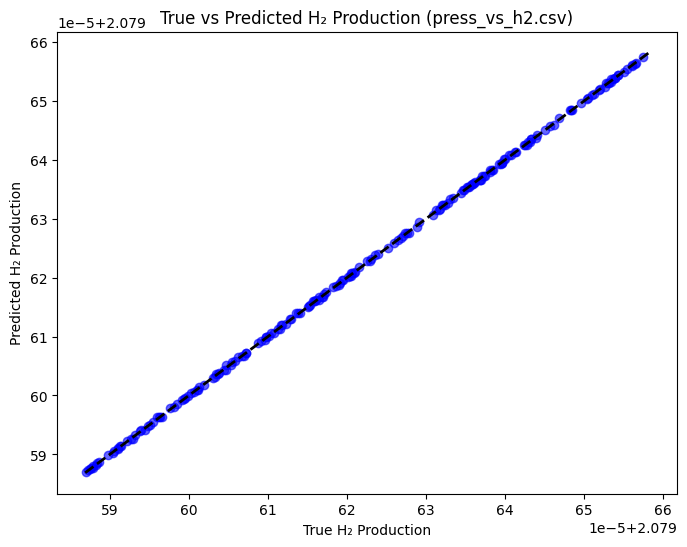

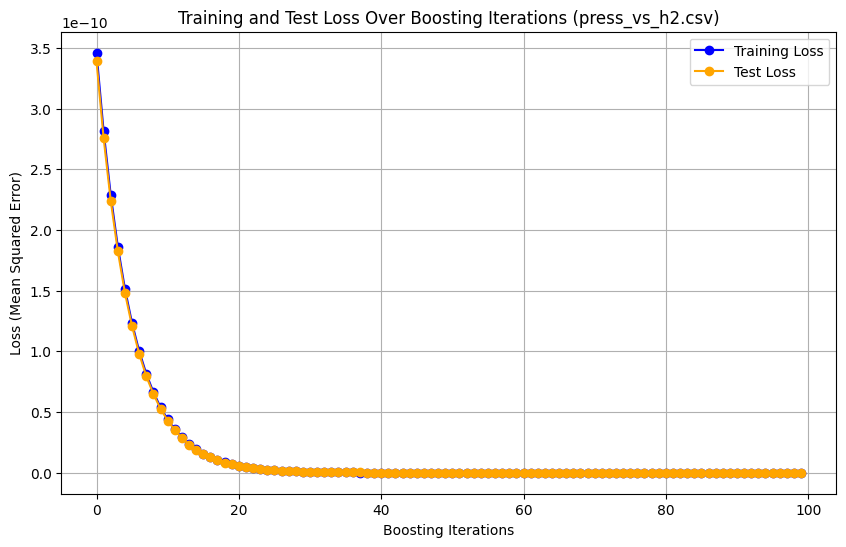

Model saved as gbr_model_temp_press_vs_h2.pkl
Analysis for temp_press_vs_h2.csv:
Mean Squared Error (MSE): 1.773028173213195e-10
R² Score: 0.999989594466405



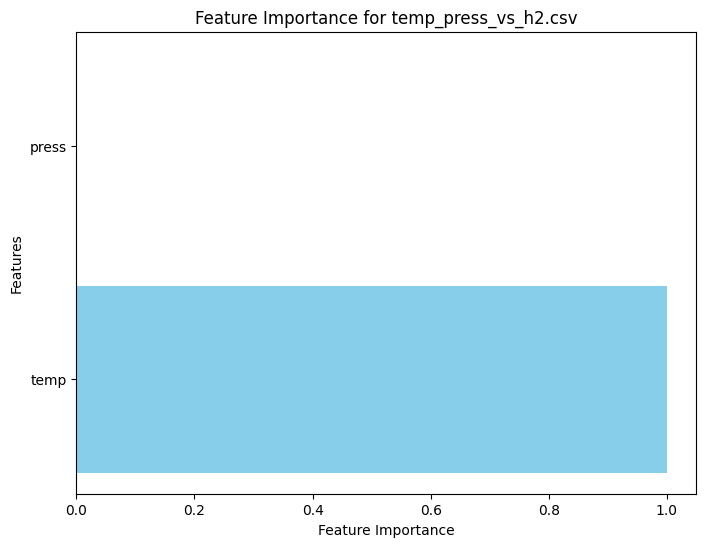

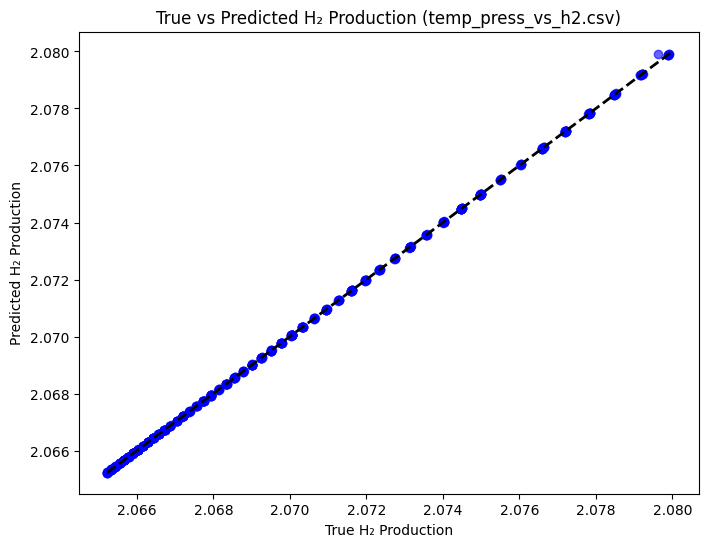

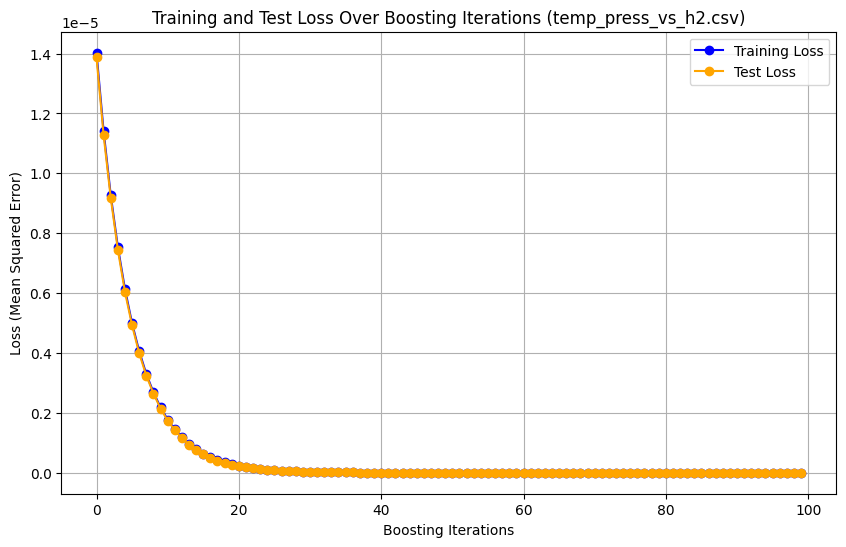

Model saved as gbr_model_biogas_mass_vs_h2.pkl
Analysis for biogas_mass_vs_h2.csv:
Mean Squared Error (MSE): 9.941685970913675e-06
R² Score: 0.9999346024606379



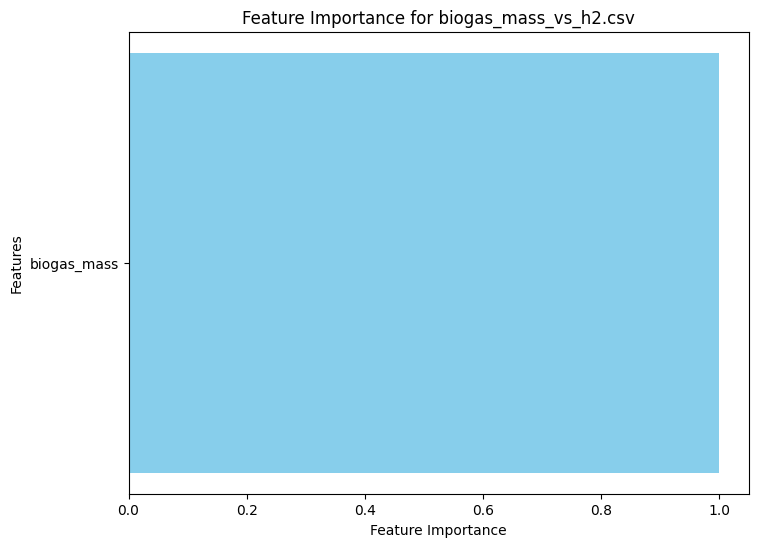

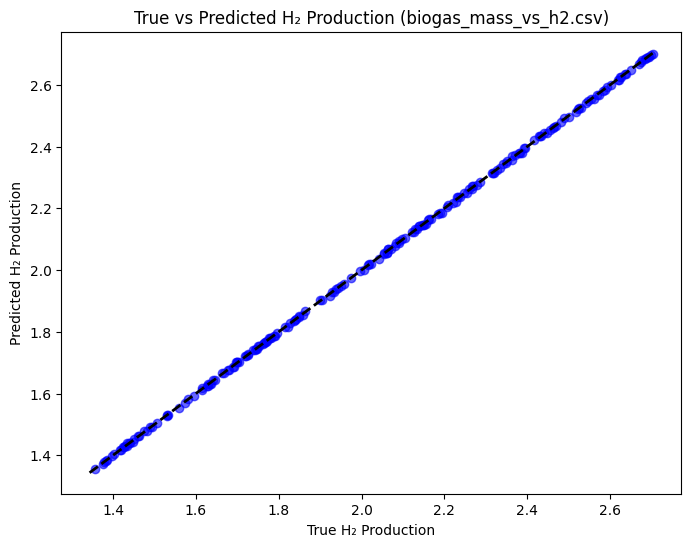

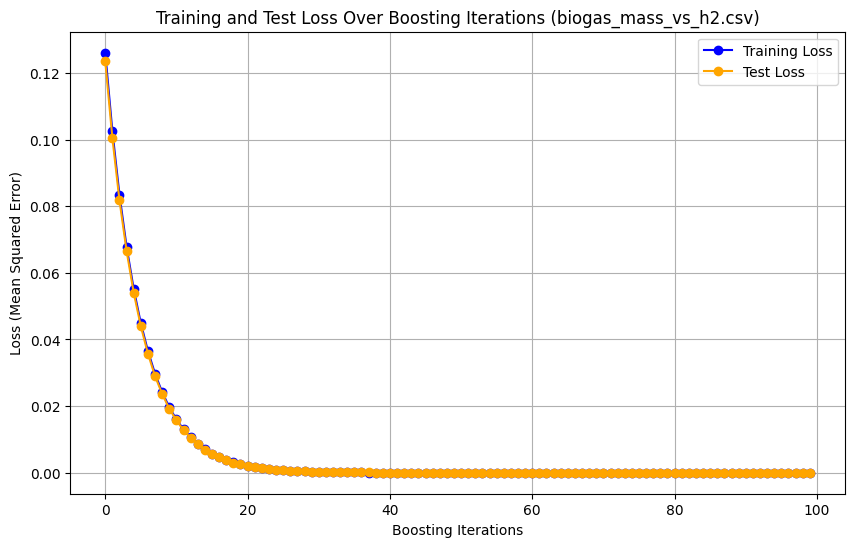

In [13]:
# Define the datasets and features
datasets = {
    "temp_vs_h2.csv": ["temp"],
    "press_vs_h2.csv": ["press"],
    "temp_press_vs_h2.csv": ["temp", "press"],
    "biogas_mass_vs_h2.csv": ["biogas_mass"]
}

# Perform analysis for each dataset
for file, features in datasets.items():
    analyze_gbr(data_path=file, features=features, target="h2_production")
